# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Testing:
for i in range(len(cities)):
    if i%50 == 0:
        print(cities[i])
    if i == len(cities) - 1:
        print(cities[i])
        
print(requests.get(url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q=" + 'rikitea').json())

607
komsomolskiy
nikolskoye
abong mbang
kruisfontein
kapaa
marsa matruh
bengkulu
gurgan
borogontsy
vanimo
ismailia
xanxere
cedar city
nome
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.58, 'feels_like': 24.31, 'temp_min': 25.58, 'temp_max': 25.58, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.96, 'deg': 126}, 'clouds': {'all': 56}, 'dt': 1612328978, 'sys': {'country': 'PF', 'sunrise': 1612276829, 'sunset': 1612324005}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
total_set_num = (len(cities) // 50) + 1

city = []
lat = []
lon = []
city = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
failed_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(total_set_num):
    
    try:    

        for record_counter in range(50):

            counter = set_counter * 50 + record_counter
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')
            record_counter += 1

            try:

                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()

                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])

            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
                
            except:
                
                print('Unexpected Error')
                    
    except IndexError:
        
        break
        

print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | komsomolskiy
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | maumere
Processing Record 6 of Set 1 | bali
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | buraydah
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | pangnirtung
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | qui nhon
Processing Record 21 of Set 1 | taolanaro
City not found. Skippin

Processing Record 38 of Set 4 | victoria
Processing Record 39 of Set 4 | lakes entrance
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | narsaq
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | aksu
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | myitkyina
Processing Record 48 of Set 4 | ales
Processing Record 49 of Set 4 | chichica
Processing Record 50 of Set 4 | oshakati
Processing Record 1 of Set 5 | kapaa
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | ola
Processing Record 4 of Set 5 | tlapacoyan
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | vrangel
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | prado
Processing Record 11 of Set 5 | inhambupe
Processing Record 12 of S

Processing Record 26 of Set 8 | ostrovnoy
Processing Record 27 of Set 8 | dauriya
Processing Record 28 of Set 8 | olafsvik
Processing Record 29 of Set 8 | prata
Processing Record 30 of Set 8 | yuxia
Processing Record 31 of Set 8 | seabra
Processing Record 32 of Set 8 | udachnyy
Processing Record 33 of Set 8 | galgani
City not found. Skipping...
Processing Record 34 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 35 of Set 8 | tucurui
Processing Record 36 of Set 8 | cidreira
Processing Record 37 of Set 8 | machali
Processing Record 38 of Set 8 | buluang
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | tabas
Processing Record 41 of Set 8 | ahvaz
Processing Record 42 of Set 8 | khandyga
Processing Record 43 of Set 8 | bjornevatn
Processing Record 44 of Set 8 | tete
Processing Record 45 of Set 8 | carbonia
Processing Record 46 of Set 8 | nemuro
Processing Record 47 of Set 8 | fort stewart
Processing Record 48 of Set 8 | tigil
Processin

Processing Record 16 of Set 12 | portland
Processing Record 17 of Set 12 | fort nelson
Processing Record 18 of Set 12 | dabhol
Processing Record 19 of Set 12 | banepa
Processing Record 20 of Set 12 | eyl
Processing Record 21 of Set 12 | mosquera
Processing Record 22 of Set 12 | piacabucu
Processing Record 23 of Set 12 | terme
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 26 of Set 12 | kota belud
Processing Record 27 of Set 12 | krasnogorsk
Processing Record 28 of Set 12 | mezen
Processing Record 29 of Set 12 | matay
Processing Record 30 of Set 12 | glendive
Processing Record 31 of Set 12 | vallenar
Processing Record 32 of Set 12 | ovre ardal
Processing Record 33 of Set 12 | namibe
Processing Record 34 of Set 12 | bunia
Processing Record 35 of Set 12 | bardiyah
Processing Record 36 of Set 12 | derzhavinsk
Processing Record 37 of Set 12 | yala
Processing Record 38 of Set 12 | rock sound
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {'City': city,
               'Latitude' : lat,
               'Longitude' : lon,
               'Max Temperature': max_temp,
               'Humidity': humidity,
               'Cloudiness': cloudiness,
               'Wind Speed': wind_speed,
               'Country': country,
               'Date': date
              }
cities_df = pd.DataFrame(cities_dict)
csv_path = 'output_data/cities.csv'
cities_df.to_csv(csv_path)
cities_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,7.00,61,0,2.06,UZ,1612329118
1,lompoc,34.6391,-120.4579,12.00,94,90,1.54,US,1612329120
2,hermanus,-34.4187,19.2345,16.11,93,0,2.55,ZA,1612329121
3,maumere,-8.6199,122.2111,28.31,77,97,4.96,ID,1612329122
4,bali,-8.5000,115.0000,29.00,79,20,2.06,ID,1612328890
...,...,...,...,...,...,...,...,...,...
549,cedar city,37.6775,-113.0619,8.00,66,1,6.69,US,1612329836
550,russell,32.3502,-85.1999,3.00,55,1,2.57,US,1612329838
551,lagoa,39.0500,-27.9833,12.97,69,49,15.25,PT,1612329839
552,simao,22.7886,100.9748,22.77,34,0,2.27,CN,1612329840


In [5]:
cities_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.153345,20.060547,9.566065,72.879061,47.442238,3.705758,1.612329e+09
std,32.726917,88.360389,17.636801,20.462151,39.414995,2.729673,2.269809e+02
min,-54.800000,-179.166700,-41.320000,11.000000,0.000000,0.050000,1.612328e+09
25%,-3.681250,-57.758200,-1.477500,61.250000,1.000000,1.572500,1.612329e+09
50%,25.058350,27.406000,15.000000,78.000000,40.000000,3.090000,1.612329e+09
75%,47.945225,95.605350,23.360000,88.000000,90.000000,5.140000,1.612330e+09
max,78.218600,179.316700,39.000000,100.000000,100.000000,17.980000,1.612330e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cleaned_cities_df = cities_df.loc[cities_df['Humidity'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,7.00,61,0,2.06,UZ,1612329118
1,lompoc,34.6391,-120.4579,12.00,94,90,1.54,US,1612329120
2,hermanus,-34.4187,19.2345,16.11,93,0,2.55,ZA,1612329121
3,maumere,-8.6199,122.2111,28.31,77,97,4.96,ID,1612329122
4,bali,-8.5000,115.0000,29.00,79,20,2.06,ID,1612328890
...,...,...,...,...,...,...,...,...,...
549,cedar city,37.6775,-113.0619,8.00,66,1,6.69,US,1612329836
550,russell,32.3502,-85.1999,3.00,55,1,2.57,US,1612329838
551,lagoa,39.0500,-27.9833,12.97,69,49,15.25,PT,1612329839
552,simao,22.7886,100.9748,22.77,34,0,2.27,CN,1612329840


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

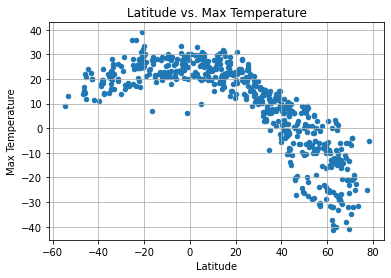

In [7]:
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Latitude vs. Max Temperature')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot

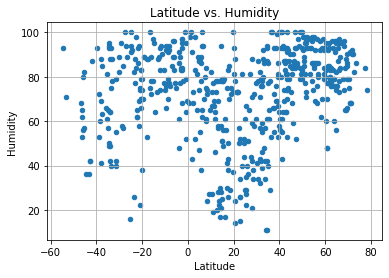

In [8]:
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity', title='Latitude vs. Humidity')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot

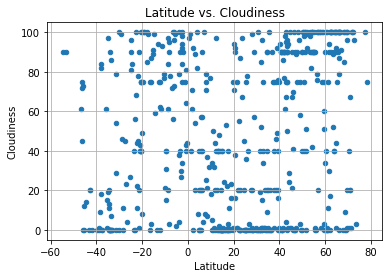

In [9]:
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title='Latitude vs. Cloudiness')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot

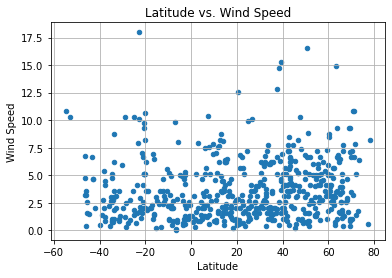

In [10]:
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [11]:
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8776210194286002
The linear regression model is y = -0.78x + 34.03


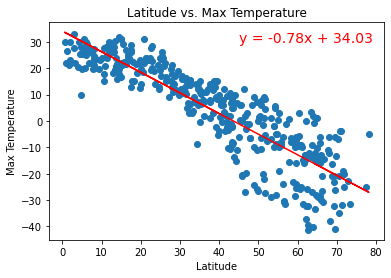

In [67]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.46168629795472077
The linear regression model is y = 0.19x + 26.98


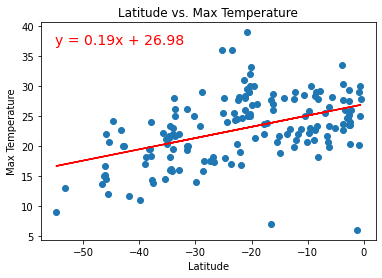

In [68]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,37),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.4222818770171658
The linear regression model is y = 0.45x + 54.93


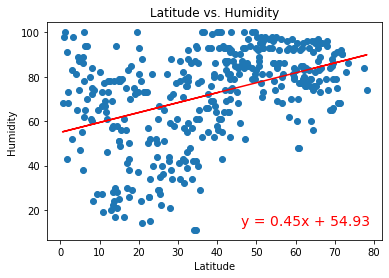

In [70]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,13),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3415013106222168
The linear regression model is y = 0.44x + 84.9


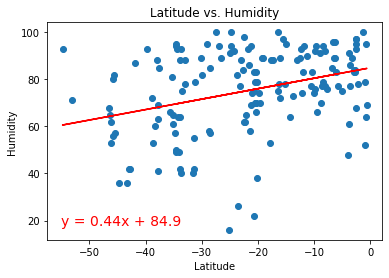

In [71]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.36635202695811153
The linear regression model is y = 0.73x + 18.64


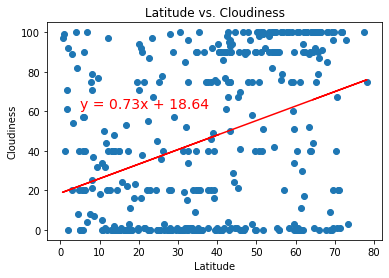

In [63]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(5,61.5),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.35873235298900785
The linear regression model is y = 0.96x + 70.49


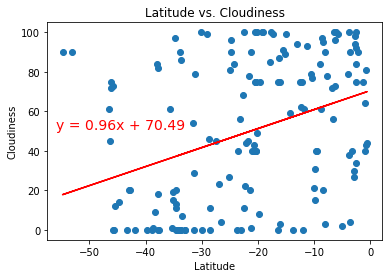

In [81]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,51),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.14467639827718076
The linear regression model is y = 0.02x + 3.12


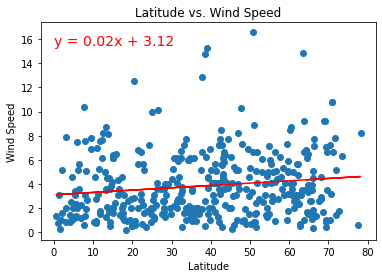

In [79]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,15.5),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.13746547485670038
The linear regression model is y = -0.03x + 2.72


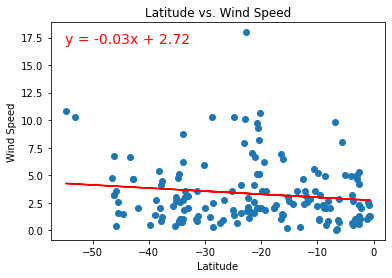

In [80]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=14,color="red")

print(f'The r-value is {rvalue}')
print(f'The linear regression model is {line_eq}')